In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e12/sample_submission.csv
/kaggle/input/playground-series-s4e12/train.csv
/kaggle/input/playground-series-s4e12/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [3]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")

test_data = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")

In [4]:
train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [5]:
train_data.isnull().sum()* 100 /len(train_data)

id                       0.000000
Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Education Level          0.000000
Occupation              29.839583
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Policy Start Date        0.000000
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64

In [6]:
test_data.isnull().sum() / len(test_data) * 100

id                       0.000000
Age                      1.561125
Gender                   0.000000
Annual Income            3.732500
Marital Status           1.542000
Number of Dependents     9.141250
Education Level          0.000000
Occupation              29.890625
Health Score             6.181125
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.350250
Vehicle Age              0.000375
Credit Score            11.431375
Insurance Duration       0.000250
Policy Start Date        0.000000
Customer Feedback        6.534500
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
dtype: float64

In [7]:
## EDA

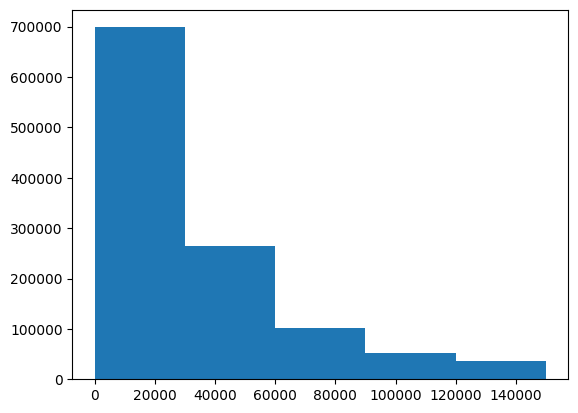

In [8]:
plt.hist(train_data['Annual Income'], bins = 5)
plt.show()

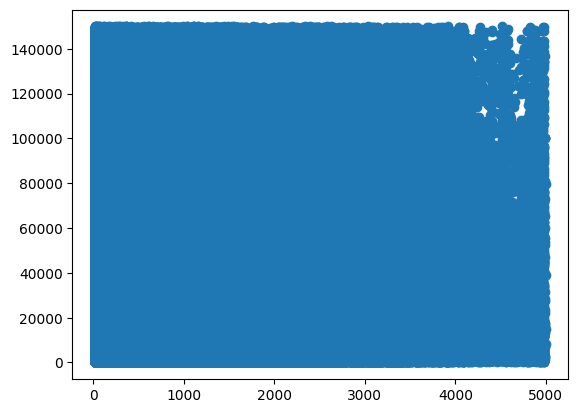

In [9]:
plt.scatter(train_data['Premium Amount'], train_data['Annual Income'])
plt.show()

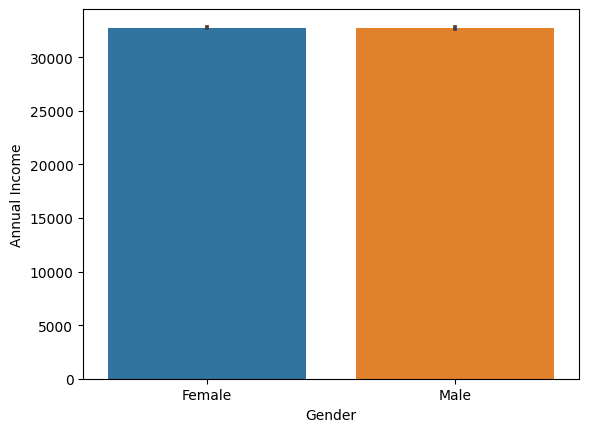

In [10]:
sns.barplot(data = train_data, x = 'Gender', y= 'Annual Income')
plt.show()

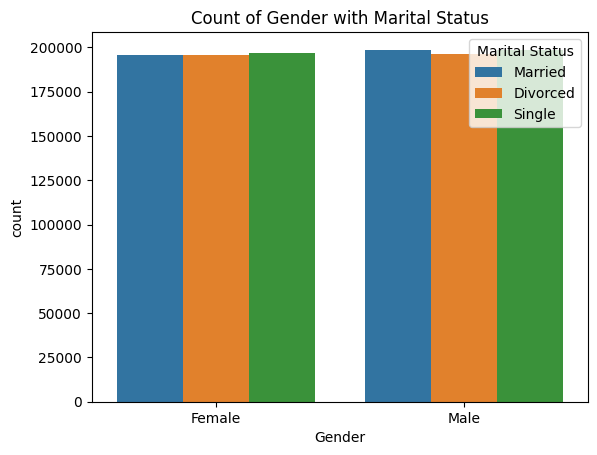

In [11]:
sns.countplot(data=train_data, x='Gender', hue='Marital Status')
plt.title("Count of Gender with Marital Status")
plt.show()

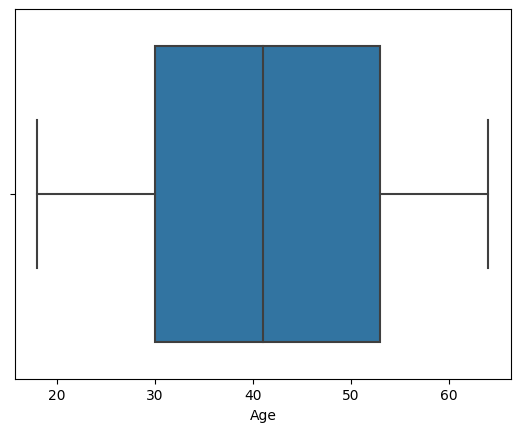

In [12]:
sns.boxplot(data = train_data, x= 'Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

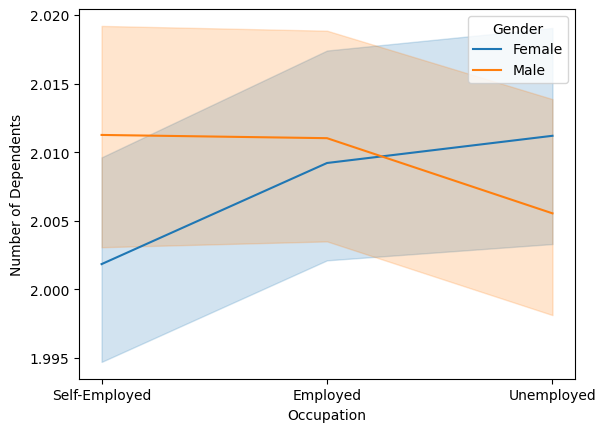

In [13]:
sns.lineplot(data = train_data, x = 'Occupation', y = 'Number of Dependents', hue = 'Gender')
plt.show()

In [14]:
test_data.isnull().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [15]:
train_data.loc[(train_data['Education Level'] == 'High School') & (train_data['Occupation'].isna()), 'Occupation'] = 'Unemployed'
test_data.loc[(test_data['Education Level'] == 'High School') & (test_data['Occupation'].isna()), 'Occupation'] = 'Unemployed'

In [16]:
train_data.loc[((train_data['Age'] > 50) | (train_data['Age'] < 21)) & train_data['Occupation'].isna(), 'Occupation'] = 'Unemployed'
test_data.loc[((test_data['Age'] > 50) | (test_data['Age'] < 21)) & test_data['Occupation'].isna(), 'Occupation'] = 'Unemployed'

In [17]:
train_data['Occupation'] = train_data['Occupation'].fillna('Unemployed')
test_data['Occupation'] = test_data['Occupation'].fillna('Unemployed')

In [18]:
train_data.loc[(train_data['Previous Claims'].isnull()) & (train_data['Occupation'] == 'Unemployed'), 'Previous Claims'] = 0.0
test_data.loc[(test_data['Previous Claims'].isnull()) & (test_data['Occupation'] == 'Unemployed'), 'Previous Claims'] = 0.0

In [19]:
train_data.loc[(train_data['Previous Claims'].isnull()) & (train_data['Annual Income'] > 50000), 'Previous Claims'] = 0.0
test_data.loc[(test_data['Previous Claims'].isnull()) & (test_data['Annual Income'] > 50000), 'Previous Claims'] = 0.0

In [20]:
train_data.loc[(train_data['Previous Claims'].isnull()) & (train_data['Education Level'] ==  'High School'), 'Previous Claims'] = 0.0
test_data.loc[(test_data['Previous Claims'].isnull()) & (test_data['Education Level'] ==  'High School'), 'Previous Claims'] = 0.0

In [21]:
train_data['Previous Claims'] = train_data['Previous Claims'].fillna(np.random.randint(0.0, 9.0))
test_data['Previous Claims'] = test_data['Previous Claims'].fillna(np.random.randint(0.0, 9.0))

In [22]:
train_data.loc[(train_data['Number of Dependents'].isnull()) & (train_data['Marital Status'] == 'Single'),'Number of Dependents']= 0.0
test_data.loc[(test_data['Number of Dependents'].isnull()) & (test_data['Marital Status'] == 'Single'),'Number of Dependents']= 0.0

In [23]:
train_data['Number of Dependents'] = train_data['Number of Dependents'].apply(lambda x: np.random.uniform(0.0, 5.0) if pd.isna(x) else x
)

test_data['Number of Dependents'] = test_data['Number of Dependents'].apply(lambda x: np.random.uniform(0.0, 5.0) if pd.isna(x) else x
)

In [24]:
train_data['Annual Income'] = train_data['Annual Income'].fillna(np.mean(train_data['Annual Income']))

test_data['Annual Income'] = test_data['Annual Income'].fillna(np.mean(test_data['Annual Income']))

In [25]:
total_feedback = 377905 + 375518 + 368753

probabilities = {
    'Average': 377905 / total_feedback,
    'Poor': 375518 / total_feedback,
    'Good': 368753 / total_feedback
}

In [26]:
train_data['Customer Feedback'] = train_data['Customer Feedback'].apply(
    lambda x: np.random.choice(['Average', 'Poor', 'Good'], p=[probabilities['Average'], probabilities['Poor'], probabilities['Good']]) 
    if pd.isna(x) else x
)

In [27]:
feedback_count = 251217 + 250434 + 246073
prop = probabilities = {
    'Average': 251217 / feedback_count,
    'Poor': 250434 / feedback_count,
    'Good': 246073 / feedback_count
}

In [28]:
test_data['Customer Feedback'] = test_data['Customer Feedback'].apply(
    lambda x: np.random.choice(['Average', 'Poor', 'Good'], p=[probabilities['Average'], probabilities['Poor'], probabilities['Good']]) 
    if pd.isna(x) else x
)

In [29]:
train_data['Credit Score'] = train_data['Credit Score'].fillna(train_data['Credit Score'].mean()) 

test_data['Credit Score'] = test_data['Credit Score'].fillna(test_data['Credit Score'].mean()) 

In [30]:
min_val = train_data['Health Score'].min()
max_val = train_data['Health Score'].max()
train_data['Health Score'] = train_data['Health Score'].apply(lambda x: np.random.uniform(min_val, max_val) if pd.isnull(x) else x)

In [31]:
min_val_test = test_data['Health Score'].min()
max_val_test = test_data['Health Score'].max()
test_data['Health Score'] = test_data['Health Score'].apply(lambda x: np.random.uniform(min_val_test, max_val_test) if pd.isnull(x) else x)

In [32]:
 train_data['Age'] = train_data['Age'].apply(lambda x: np.random.uniform(18.0, 64.0) if pd.isnull(x) else x)

 test_data['Age'] = test_data['Age'].apply(lambda x: np.random.uniform(18.0, 64.0) if pd.isnull(x) else x)

In [33]:
train_data['Marital Status'] = train_data['Marital Status'].fillna('Single')

test_data['Marital Status'] = test_data['Marital Status'].fillna('Single')

In [34]:
 train_data['Insurance Duration'] = train_data['Insurance Duration'].fillna(0)
test_data['Insurance Duration'] = test_data['Insurance Duration'].fillna(0)

In [35]:
 test_data['Vehicle Age'] = test_data['Vehicle Age'].apply(lambda x: np.random.uniform(0.0, 11.0) if pd.isnull(x) else x)

In [36]:
train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.00000,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Unemployed,15.569731,Rural,...,1.0,12.0,694.00000,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,592.92435,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Unemployed,10.938144,Rural,...,1.0,0.0,367.00000,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.00000,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [37]:
train_data['Gender'] = train_data['Gender'].replace({"Female": 1, "Male" : 0})
train_data['Smoking Status'] = train_data['Smoking Status'].replace({"Yes" : 1, "No": 0})
test_data['Gender'] = test_data['Gender'].replace({"Female": 1, "Male" : 0})
test_data['Smoking Status'] = test_data['Smoking Status'].replace({"Yes" : 1, "No": 0})

/tmp/ipykernel_17/3765079498.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Gender'] = train_data['Gender'].replace({"Female": 1, "Male" : 0})
/tmp/ipykernel_17/3765079498.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Smoking Status'] = train_data['Smoking Status'].replace({"Yes" : 1, "No": 0})
/tmp/ipykernel_17/3765079498.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

In [38]:
 train_data['Vehicle Age'] = train_data['Vehicle Age'].fillna(0.0)

In [39]:
Y = train_data['Premium Amount']
X = train_data.drop("Premium Amount", axis = 1)

In [40]:
lb = LabelEncoder()
cat_cols = []  

for col in X.columns:
    if X[col].dtype == 'object':  
        cat_cols.append(col)  
        X[col] = lb.fit_transform(X[col])

In [41]:
cat_cols

['Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Policy Start Date',
 'Customer Feedback',
 'Exercise Frequency',
 'Property Type']

In [42]:
sd = MinMaxScaler()
X = sd.fit_transform(X)
Y = sd.fit_transform(np.array(Y).reshape(-1, 1))

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 45)

In [44]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [45]:
y_pred = lr.predict(X_test)